In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

membaca data customer.csv

In [3]:
Customer = pd.read_csv('/content/drive/MyDrive/Dataset/Case Study - Customer.csv', sep=';')
print(Customer.head())

   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57


Data Cleaning

In [4]:
Customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [7]:
Customer[Customer['Marital Status'].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


In [8]:
Customer['Marital Status'].value_counts()

Married    340
Single     104
Name: Marital Status, dtype: int64

In [9]:
Customer['Marital Status'] = Customer['Marital Status'].fillna('Single')

In [10]:
Customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [11]:
Customer.duplicated().sum()

0

In [12]:
Customer['Income'] = Customer['Income'].replace(',', '.', regex=True).astype(float)

In [13]:
Customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


membaca data product.csv

In [14]:
Product = pd.read_csv('/content/drive/MyDrive/Dataset/Case Study - Product.csv', sep=';')
print(Product.head())

  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200


In [15]:
Product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [16]:
Store = pd.read_csv('/content/drive/MyDrive/Dataset/Case Study - Store.csv', sep=';')
print(Store.head())

   StoreID         StoreName GroupStore           Type   Latitude   Longitude
0        1     Prima Tendean      Prima   Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima   Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima   Modern Trade  -7,797068  110,370529
3        4       Gita Ginara       Gita  General Trade  -6,966667  110,416664
4        5           Bonafid       Gita  General Trade  -7,250445  112,768845


In [17]:
Store['Latitude'] = Store['Latitude'].replace(',','.', regex=True).astype(float)
Store['Longitude'] = Store['Longitude'].replace(',','.', regex=True).astype(float)

Data Cleaning

In [18]:
Store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

Membaca data transaction.csv

In [19]:
Transaction = pd.read_csv('/content/drive/MyDrive/Dataset/Case Study - Transaction.csv', sep=';')
print(Transaction.head())

  TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   
3       TR35256         160  01/01/2022        P1   8800    7        61600   
4       TR41231         386  01/01/2022        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4  


Data Cleaning

In [20]:
Transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [21]:
Transaction['TransactionID'].value_counts()

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64

In [22]:
Transaction[Transaction['TransactionID']=='TR71313']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,21/05/2022,P1,8800,10,88000,8
3336,TR71313,401,30/08/2022,P3,7500,6,45000,11
3722,TR71313,370,26/09/2022,P3,7500,2,15000,3


penggabungan beberapa dataset

In [23]:
customers_transaction = pd.merge(
    left=Customer,
    right=Transaction,
    how="left",
    left_on="CustomerID",
    right_on="CustomerID"
)
customers_transaction.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,1,55,1,Married,5.12,TR54475,23/02/2022,P8,16000,1,16000,9
1,1,55,1,Married,5.12,TR44292,05/05/2022,P3,7500,4,30000,1
2,1,55,1,Married,5.12,TR7576,06/05/2022,P7,9400,2,18800,2
3,1,55,1,Married,5.12,TR2162,03/06/2022,P10,15000,4,60000,14
4,1,55,1,Married,5.12,TR14167,24/06/2022,P1,8800,7,61600,2


In [24]:
customers_transaction_product = pd.merge(
    left=Product,
    right=customers_transaction,
    how="left",
    left_on="ProductID",
    right_on="ProductID"
)
customers_transaction_product.head()

,ProductID,Product Name,Price_x,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,Price_y,Qty,TotalAmount,StoreID
0,P1,Choco Bar,8800,1,55,1,Married,5.12,TR14167,24/06/2022,8800,7,61600,2
1,P1,Choco Bar,8800,2,60,1,Married,6.23,TR97527,18/03/2022,8800,9,79200,8
2,P1,Choco Bar,8800,3,32,1,Married,9.17,TR496,25/01/2022,8800,2,17600,8
3,P1,Choco Bar,8800,4,31,1,Married,4.87,TR92144,18/02/2022,8800,5,44000,6
4,P1,Choco Bar,8800,6,23,0,Married,2.33,TR38554,21/04/2022,8800,5,44000,7


In [25]:
all_merge = pd.merge(
    left=Store,
    right=customers_transaction_product,
    how="left",
    left_on="StoreID",
    right_on="StoreID"
)
print(all_merge.head())
print(all_merge.info())

   StoreID      StoreName GroupStore          Type  Latitude   Longitude  \
0        1  Prima Tendean      Prima  Modern Trade      -6.2  106.816666   
1        1  Prima Tendean      Prima  Modern Trade      -6.2  106.816666   
2        1  Prima Tendean      Prima  Modern Trade      -6.2  106.816666   
3        1  Prima Tendean      Prima  Modern Trade      -6.2  106.816666   
4        1  Prima Tendean      Prima  Modern Trade      -6.2  106.816666   

  ProductID Product Name  Price_x  CustomerID  Age  Gender Marital Status  \
0        P1    Choco Bar     8800          31   38       0        Married   
1        P1    Choco Bar     8800          44   40       0        Married   
2        P1    Choco Bar     8800          67   19       0         Single   
3        P1    Choco Bar     8800          80   44       0        Married   
4        P1    Choco Bar     8800          81   44       0        Married   

   Income TransactionID        Date  Price_y  Qty  TotalAmount  
0    9.61      

mengkonversi kolom 'Date'

In [26]:
all_merge['Date'] = pd.to_datetime(all_merge['Date'])

<ipython-input-26-1ad75efa2109>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  all_merge['Date'] = pd.to_datetime(all_merge['Date'])


In [27]:
all_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   StoreID         5020 non-null   int64         
 1   StoreName       5020 non-null   object        
 2   GroupStore      5020 non-null   object        
 3   Type            5020 non-null   object        
 4   Latitude        5020 non-null   float64       
 5   Longitude       5020 non-null   float64       
 6   ProductID       5020 non-null   object        
 7   Product Name    5020 non-null   object        
 8   Price_x         5020 non-null   int64         
 9   CustomerID      5020 non-null   int64         
 10  Age             5020 non-null   int64         
 11  Gender          5020 non-null   int64         
 12  Marital Status  5020 non-null   object        
 13  Income          5020 non-null   float64       
 14  TransactionID   5020 non-null   object        
 15  Date

membuat data baru untuk regression

In [28]:
new_data = all_merge.groupby('Date').agg({'Qty' : 'sum'}).reset_index()

In [29]:
new_data

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


visualisasi new_data

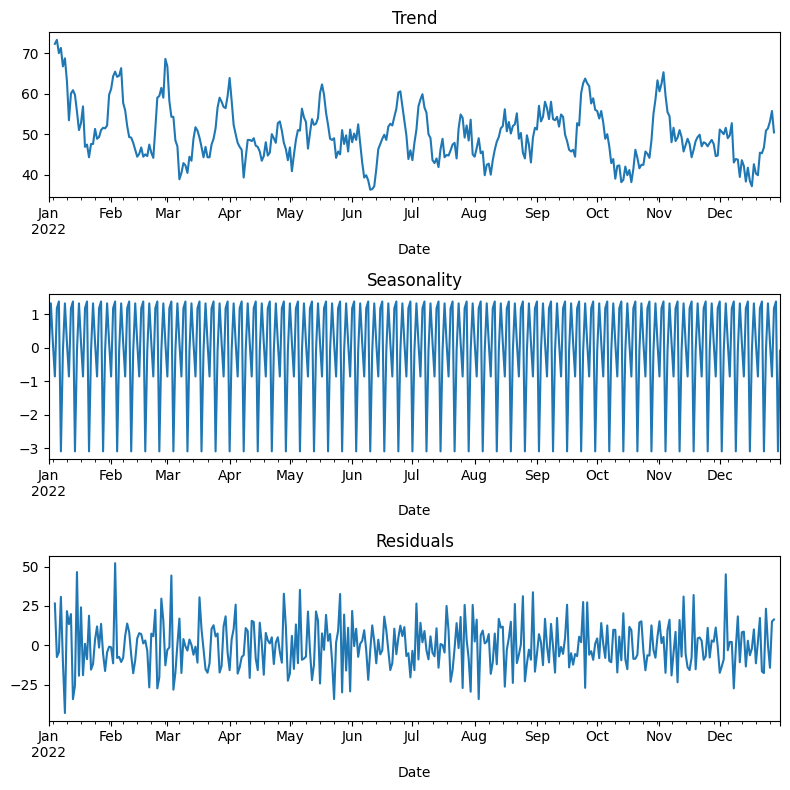

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt

decomposed = seasonal_decompose(new_data.set_index('Date'))

plt.figure(figsize = (8, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

In [31]:
cut_off = round(new_data.shape[0]*0.8)
df_train = new_data[:cut_off]
df_test = new_data[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((292, 2), (73, 2))

In [32]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
287,2022-10-15,33
288,2022-10-16,26
289,2022-10-17,53
290,2022-10-18,47


In [33]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,44


<Axes: xlabel='Date', ylabel='Qty'>

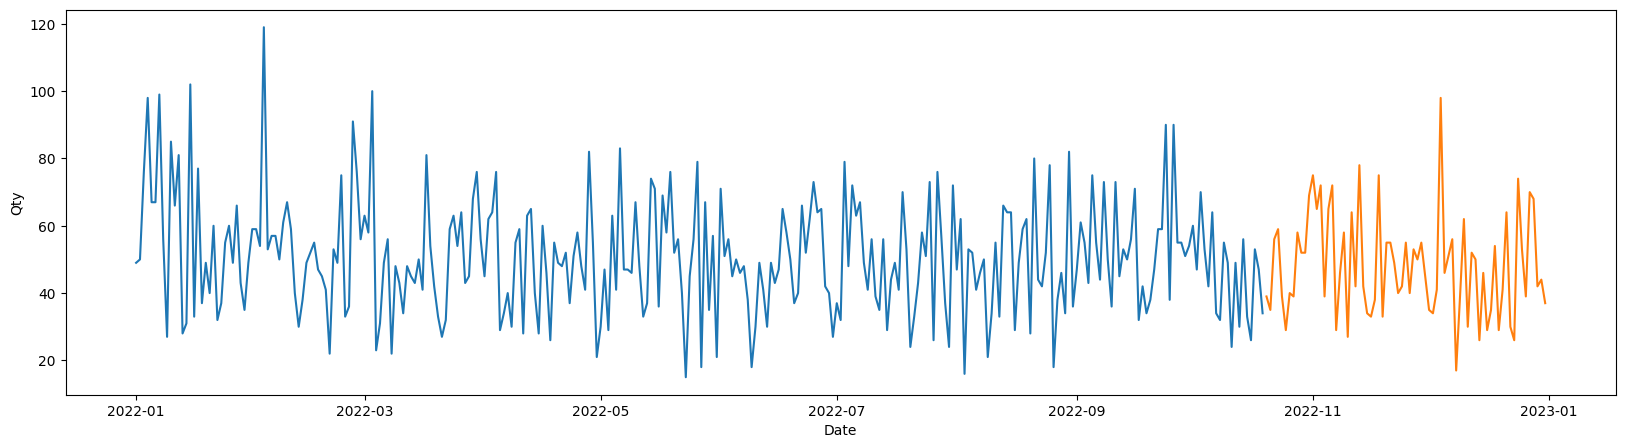

In [34]:
import seaborn as sns

plt.figure(figsize =(20, 5))
sns.lineplot(data = df_train, x=df_train['Date'], y=df_train['Qty'])
sns.lineplot(data = df_test, x=df_test['Date'], y=df_test['Qty'])

Machine Learning Regression (Time Series)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmse(y_actual, y_pred):
  """
    function to calculate RMSE
  """
  print(f'RMSE Value {mean_squared_error(y_actual, y_pred)**0.5}')

def eval(y_actual, y_pred):
  """
    function to eval machine learning modelling
  """
  rmse(y_actual, y_pred)
  print(f'MAE Value {mean_absolute_error(y_actual, y_pred)}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

RMSE Value 15.47240015957555
MAE Value 12.357079716384185


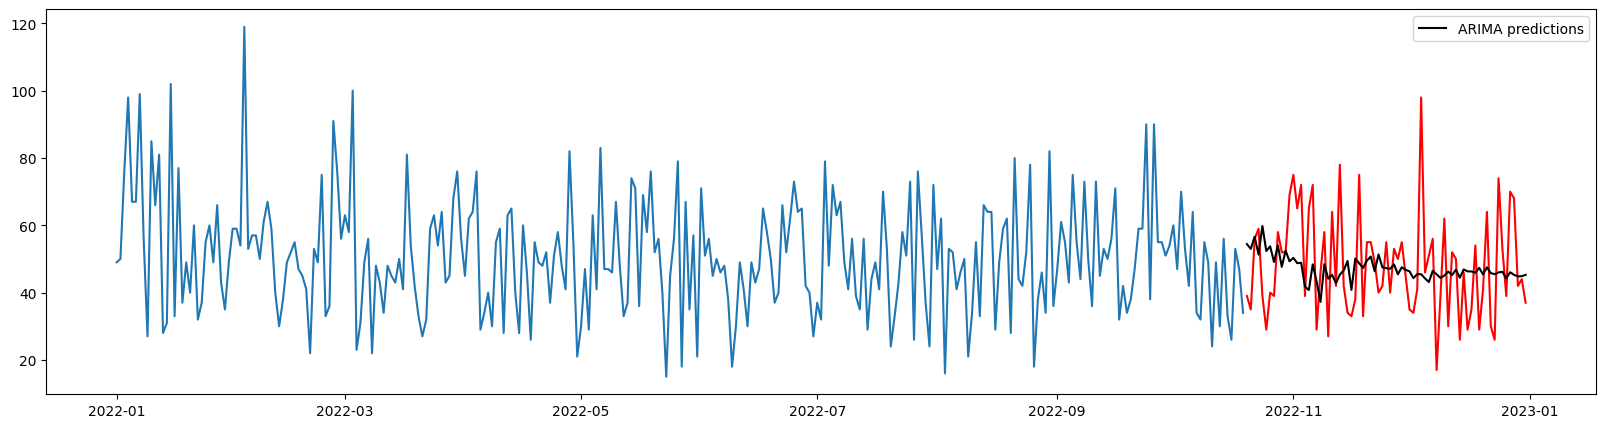

In [ ]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA

df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']
ARIMAmodel = ARIMA(y, order=(40, 2, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']
eval(df_test['Qty'], y_pred_out)

plt.figure(figsize =(20, 5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='ARIMA predictions')
plt.legend()